## Hierarchical Clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

The algorithm follows the following steps:
- The first step is to treat each data point as a single cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
- The next step is to group the closest two clusters and combine them into one cluster. Therefore, the number of clusters will now be K-1.
- Next, again, group the closest two clusters and combine them into one cluster. Therefore, the number of clusters will now be K-2.
- Keep repeating the above three steps until K=1, which represents one cluster.

Look at a dendrogram to understand the process better.  A dendrogram is a tree-like diagram that records the sequences of merges or splits.    

### Advantages of Hierarchical Clustering
- The results of hierarchical clustering are usually presented in a dendrogram, which is useful for understanding how the clusters are formed.
- Hierarchical clustering is easy to implement.
- The dendrogram produced by hierarchical clustering can help in determining the number of clusters.

### Disadvantages of Hierarchical Clustering
- Hierarchical clustering can be computationally expensive when the number of data points are large.
- The algorithm does not work well with categorical data.

### Applications of Hierarchical Clustering
- Gene Expression
- Document Clustering
- Image Segmentation

### Distance Metrics
The following are the most commonly used distance metrics for hierarchical clustering:
- Euclidean Distance
- Manhattan Distance
- Cosine Distance
- Jaccard Distance

### Agglomerative Hierarchical Clustering
Agglomerative is the bottom-up approach in hierarchical clustering. In this approach, each data point is treated as a single cluster and then successively merge or agglomerate (hence the name of the algorithm) the pairs of clusters. The process continues until all the clusters are merged together. The linkage criteria determine the metric used for the merge strategy: 
- Ward
- Complete
- Average
- Single

Parameters of AgglomerativeClustering class:
- n_clusters: The number of clusters to find.
- affinity: The distance metric used to compute the linkage.
- linkage: The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
- distance_threshold: The linkage distance threshold above which, clusters will not be merged.

### Ward Linkage
Ward linkage is the default choice for AgglomerativeClustering. It minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

### Complete Linkage
Complete linkage or maximum linkage minimizes the maximum distance between observations of pairs of clusters.

### Average Linkage
Average linkage minimizes the average of the distances between all observations of pairs of clusters.

### Single Linkage
Single linkage minimizes the distance between the closest observations of pairs of clusters.

### Steps to Perform Hierarchical Clustering
- Load the data.
- Create a dendrogram to help determine the number of clusters.
- Fit the model.
- Visualize the results.

Parameter selection is crucial in hierarchical clustering. The number of clusters to find is the most important parameter. The number of clusters can be determined using the dendrogram. The dendrogram is a tree-like diagram that records the sequences of merges or splits. The height of the dendrogram shows the distance between the clusters. The number of clusters can be determined by selecting the number of vertical lines that can be cut by a horizontal line.

Parameter selection method: use trial and error to find the optimal number of clusters. The optimal number of clusters is the number of vertical lines that can be cut by a horizontal line.
  

In this notebook, we will implement hierarchical clustering using the Agglomerative approach. We will use the AgglomerativeClustering class from the sklearn.cluster module.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
sns.set_style("whitegrid")

<Figure size 1000x300 with 0 Axes>

In [4]:
address = 'data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

X = cars[['mpg','disp','hp','wt']].values

y = cars.iloc[:,(9)].values

### Using scipy to generate dendrograms

In [5]:
Z = linkage(X, 'ward')

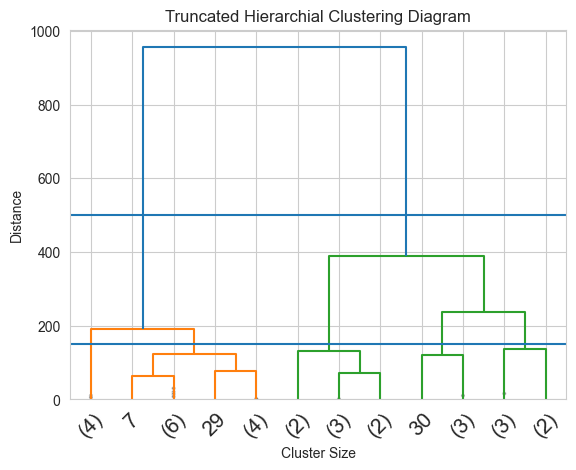

In [6]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating hierarchical clusters

In [7]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [8]:
Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [9]:
Hclustering = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875